# Introduction to Scikit-Learn 

This is notebook demonstrate some of the most useful functions of the beautiful Sci-Learn library

Steps

0. An end-to-end ScikitLearn workflow
1. Getting the data ready
2. Choose the right algorithm for our problem
3. Fit the model/algorithm and use to make prediction on our data
4. Evaluting a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together


In [1]:
## Starter
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC

heart_disease = pd.read_csv("heart-disease.csv")
car_sales=pd.read_csv("car-sales.csv")


## 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1. Get data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create x (feaatures matrix)
x = heart_disease.drop("target",axis=1)

# create y (labels)
y = heart_disease["target"]

In [4]:
# 2. Choose right model and hyperparameters
import sklearn
from sklearn.ensemble import RandomForestClassifier
clf  = RandomForestClassifier(n_estimators = 100)

# keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test,y_train , y_test = train_test_split(x,y,test_size=0.2)  

In [6]:
clf.fit(x_train, y_train);

In [7]:
# make a prediction
# y_label = clf.predict(np.array([0,2,3,4]))

# This will through ValueError: Expected 2D array, got 1D array instead:

In [8]:
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [9]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3


In [10]:
y_test

66     1
61     1
147    1
256    0
29     1
      ..
18     1
60     1
276    0
219    0
140    1
Name: target, Length: 61, dtype: int64

In [11]:
# 4. Evaulate the model on train data
clf.score(x_train, y_train)

1.0

In [12]:
# 5. Evaulate the model on test data
clf.score(x_test,y_test)

0.8032786885245902

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.82      0.86      0.84        37

    accuracy                           0.80        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[17,  7],
       [ 5, 32]], dtype=int64)

In [15]:
accuracy_score(y_test,y_preds)

0.8032786885245902

In [16]:
# 5. Improve a model
# Try different of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set:{clf.score(x_test,y_test)*100:2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set:80.327869%

Trying model with 20 estimators...
Model accuracy on test set:83.606557%

Trying model with 30 estimators...
Model accuracy on test set:85.245902%

Trying model with 40 estimators...
Model accuracy on test set:80.327869%

Trying model with 50 estimators...
Model accuracy on test set:81.967213%

Trying model with 60 estimators...
Model accuracy on test set:81.967213%

Trying model with 70 estimators...
Model accuracy on test set:81.967213%

Trying model with 80 estimators...
Model accuracy on test set:81.967213%

Trying model with 90 estimators...
Model accuracy on test set:80.327869%



In [17]:
# 6. save model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb")) # we = write binary

In [18]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb")) # rb = read Binary
loaded_model.score(x_test,y_test)

0.8032786885245902

# Introduction to Scikit-Learn 

This is notebook demonstrate some of the most useful functions of the beautiful Sci-Learn library

In [19]:
#Let's listify the contents

What_were_going_to_cover = [
"0. An end-to-end ScikitLearn workflow",
"1. Getting the data ready",
"2. Choose the right algorithm for our problem",
"3. Fit the model/algorithm and use to make prediction on our data",
"4. Evaluting a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together"]


In [20]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting the data ready

Three main things we have to do:
1. Split the data into features and labels (x & y)
2. filling (also called imputing) or disregarding missing values
3. Converting non numberical values to numerical values(also calles features encoding)

In [21]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
x = heart_disease.drop("target", axis =1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# split data into training and test data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [26]:
x.shape

(303, 13)

## 1.1 Sure it's all numeric

In [27]:
car_sales=pd.read_csv("car-sales-extended.csv")
car_sales.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [28]:
len(car_sales)

1000

In [29]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [30]:
# Split data into x and y
x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

# Split into training and test data
x_train, x_test,Y_train,y_test = train_test_split(x,y,test_size=0.2)

In [31]:
# Building machine learning model
from sklearn.ensemble import RandomForestRegressor

model  = RandomForestRegressor()
# model.fit(x_train,y_train)
# model.score(x_test,y_test)

# This will through ValueError: could not convert string to float: 'Honda'

In [32]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [33]:
# Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()  # take OneHotEncoder as One_hot

# Hey columntrasformer take OneHotEncoder and apply in to cater feature and remaing data
# dont do any thing to remainder
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_feature)],
                               remainder = "passthrough")
# fit transformer to X 
transformed_x = transformer.fit_transform(x)

In [34]:
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [35]:
pd.DataFrame((transformed_x))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [36]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [37]:
#let's refit model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)
model  = RandomForestRegressor(n_estimators=22)
model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=22)

In [38]:
model.score(x_test,y_test)

0.30478804316076347

## 1.2 What if there were missing values? ID-110

1. fill them with some value (also known as imputation)
2. Removes the samples with missing data altoghther

In [39]:
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [40]:
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [41]:
# create x and y
x = car_sales_missing.drop("Price",axis =1)
y = car_sales_missing["Price"]

In [42]:
# Let's try and convert into number
# Turn the categories into number

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()  # take OneHotEncoder as One_hot

# Hey columntrasformer take OneHotEncoder and apply in to cater feature and remaing data
# dont do any thing to remainder
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_feature)],
                               remainder = "passthrough")
# fit transformer to X 
transformed_x = transformer.fit_transform(x)
transformed_x

<10x16 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

### Option 1. Fill missing data with Pandas

In [43]:
# Fill the "make" coloumn
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the "colour" coloumn
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the "Odometer [KM]" coloumn
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(),inplace=True)

# Fill the "Doors" coloumn
car_sales_missing["Doors"].fillna(4,inplace=True)

In [44]:
# Check Dataframe again

car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       2
dtype: int64

In [45]:
# Removes rows with missing price value 
car_sales_missing.dropna(inplace=True)

In [46]:
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       0
dtype: int64

In [47]:
len(car_sales_missing)

8

In [48]:
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [49]:
# Let's try and convert into number
# Turn the categories into number

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()  # take OneHotEncoder as One_hot

# Hey columntrasformer take OneHotEncoder and apply in to cater feature and remaing data
# dont do any thing to remainder
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_feature)],
                               remainder = "passthrough")
# fit transformer to X 
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,
        0.0, 150043.0, '$4,000'],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 87899.0, '$5,000'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 92302.66666666667, '$7,000'],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 11179.0, '$22,000'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,
        0.0, 213095.0, '$3,500'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 92302.66666666667, '$4,500'],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
        0.0, 92302.66666666667, '$7,500'],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,
        0.0, 31600.0, '$9,700']], dtype=object)

## Option 2: Filling missing values with Scikit-Learn 
ID- 113

In [50]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [51]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [52]:
# Drop the rows with no data for price
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [53]:
# split into x and y
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [54]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [56]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing "& numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant",fill_value="missing")
door_imputer = SimpleImputer(strategy = "constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (Something that fills missing data)
imputer  =ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)   
])

#Transform the data
filled_x_train= imputer.fit_transform(x_train)
filled_x_test= imputer.fit_transform(x_test)
filled_x_train


array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [57]:
car_sales_filled_train= pd.DataFrame(filled_x_train, columns = ["Make","Colour",
                                  "Doors","Odometer (KM)"])
car_sales_filled_test= pd.DataFrame(filled_x_test, columns = ["Make","Colour",
                                  "Doors","Odometer (KM)"])
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [58]:
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [59]:
# Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()  # take OneHotEncoder as One_hot

# Hey columntrasformer take OneHotEncoder and apply in to cater feature and remaing data
# dont do any thing to remainder
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_feature)],
                               remainder = "passthrough")
# fit transformer to X 
transformed_x_train = transformer.fit_transform(car_sales_filled_train)
transformed_x_test = transformer.fit_transform(car_sales_filled_test)
transformed_x_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [60]:
# Now we got our data as numbers and filled 
# Lets fit model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


model=RandomForestRegressor(n_estimators = 100)
model.fit(transformed_x_train,y_train)
model.score(transformed_x_test,y_test)

0.25366332156443805

## 2. Choosing the right estimators/algorithms for problem
**some thing to note**

* sklearn refers to learining model, algorithm as estimators.
* classification problem - prediciting a category or multiple category
    * clf (short for classcification )
* Regression model: predicting a number

In [61]:
# get california housing data set
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()
house


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [62]:
house_df = pd.DataFrame(house["data"],columns=house["feature_names"])
house_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [63]:
house_df["target"] = house["target"]
house_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [64]:
# import algorithm
from sklearn.linear_model import Ridge


#Setup random seed
np.random.seed(42)

# create data
x = house_df.drop("target",axis=1)
y = house_df["target"] #median house price in $100,000m

#Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#fit model
model = Ridge()
model.fit(x_train,y_train)

# check score
model.score(x_test,y_test)

0.5758549611440126

In [65]:
# import algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
model = RandomForestRegressor()

#Setup random seed
np.random.seed(42)

# create data
x = house_df.drop("target",axis=1)
y = house_df["target"] #median house price in $100,000m

#Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#fit model
model.fit(x_train,y_train)

# check score
model.score(x_test,y_test)


0.8065734772187598

## 2.2 Choosing  an estimator for a classification problem

In [66]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [67]:
len(heart_disease)

303

sklearn map saying use `LinearSVC`.

In [68]:
# import warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

#setup random seed
np.random.seed(42)

#make data ready
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Instantiate linearSVc
clf = LinearSVC()

# fit the model
clf.fit(x_train,y_train)

#check score
clf.score(x_test,y_test)

0.8688524590163934

In [69]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make data ready
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# fit the model
clf.fit(x_train,y_train)

#check score
clf.score(x_test,y_test)

0.8524590163934426

# *Titbit:*
     1. If you have structured data use ensemble method
     2. If you have unstructured data use deep learning or transfer learning

## 3. Fit the model/algortihm on our data and use it to make

3.1 Fitting model to data

In [70]:
#import RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make data ready
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# fit the model(training the machine learning model)
clf.fit(x_train,y_train)

#check score
clf.score(x_test,y_test)

0.8524590163934426

In [71]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [72]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make prediction using data.         ID=123  

2 Ways to make predictions:

      1. `predict()`
      2. `predict_proba()`

In [73]:
# use trained model to make predictions
# clf.predict(np.array([1,2,5,7,2]))  # this will throgh ValueError: Expected 2D array, got 1D array

In [74]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [75]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [76]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [77]:
# Compare predictions to truth lables to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [78]:
clf.score(x_test,y_test)

0.8524590163934426

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

## Make predictions with predict_proba

In [80]:
#predict_proba() return estimates for all classes are ordered by the label of classes
# return probilities of a classification label
clf.predict_proba(x_test[:10])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [81]:
clf.predict(x_test[:10])

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [82]:
x_test[:10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2


In [83]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can be use for regression model

In [84]:
house_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = house_df.drop("target",axis=1)
y = house_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=200)
model.fit(x_train,y_train)

y_preds = model.predict(x_test)
y_preds[:10]

array([0.488895  , 0.72187   , 4.93694155, 2.561315  , 2.300585  ,
       1.63155005, 2.30709   , 1.657455  , 2.520435  , 4.84596315])

In [86]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [87]:
#compara the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3264092437742251

In [88]:
house_df["target"[:10]]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

# 4. Evalutaing ML model

## There are 3 ways to evaluate scikit_learn model
    1. Estimators's bulit-in `score()` method
    2. scoring parameter
    3. problem specific  metric function

### 4.1 Evaluating a model with the `score()` method

In [89]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make data ready
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# fit the model
clf.fit(x_train,y_train)

#check score
clf.score(x_test,y_test)

0.8524590163934426

In [90]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make data ready
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)

# fit the model
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [91]:
# Highest value for the.score() method is 1.0 and the lowest is 0.0
clf.score(x_train,y_train)

1.0

In [92]:
clf.score(x_test,y_test)

0.8688524590163934

score() method on regressor problem

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = house_df.drop("target",axis=1)
y = house_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

#### The default score() for regression metric is r-squared for regression algotihms
##### hightest = 1.0  lowesest = 0.0

In [94]:
model.score(x_test,y_test)

0.8065734772187598

### 4.2 Evaluating using scoring paramter 

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make data ready
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# fit the model
clf.fit(x_train,y_train)


RandomForestClassifier()

In [96]:
clf.score(x_test,y_test)

0.8524590163934426

In [97]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [98]:
np.random.seed(42)

# Single training and test split data
clf_single_score = clf.score(x_test,y_test)

#Take the mean of 5-fold cross-validation score
clf_val_score = np.mean(cross_val_score(clf,x,y,cv=5))

#compare the two 
clf_single_score, clf_val_score

(0.8524590163934426, 0.8248087431693989)

###### Default scoring parameter of classifier = mean accuracy
clf.score()

In [99]:
# scoring parameter set to None by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evalution matrics

1. Accuracy
2. Area under ROC curve
3. Confussion matrix
4. Classification report

### **1. Accuracy**

In [100]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,x,y,cv=5)
cross_val_score


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [102]:
np.mean(cross_val_score)

0.8248087431693989

In [103]:
print(f"Heart Disease Classifier cross_validation Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier cross_validation Accuracy: 82.48%


### **2. Area under ROC Curve**   
ROC = Receiver Operating characteristics (AOC/ROC)

* Area under curve(AUC)
* ROC Curve  

ROC Curves are a comparison of a model's true positive rate (tpr) versus a model false positive rate (fpr)

* True Positive = model predicts 1 when truth is 1
* False Positive = model predicts 1 when truth is 0.
* False Negative = model predicts 0 when truth is 1.
* True Negative = model predicts 0 when truth is 0.

In [104]:
# Create x_test, x_train,y_train, y_test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [105]:
from sklearn.metrics import roc_curve

# fit clf
clf.fit(x_train,y_train)

# make predictions with probalities
y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [106]:
y_probe_positive = y_probs[:,1]
y_probe_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [107]:
# calculate fpr, tpr and threshold
fpr, tpr, threshold = roc_curve(y_test,y_probe_positive)

# check
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [108]:
tpr

array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
       0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
       0.9375 , 0.96875, 0.96875, 1.     , 1.     ])

In [109]:
threshold

array([2.  , 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
       0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
       0.28, 0.23, 0.2 , 0.  ])

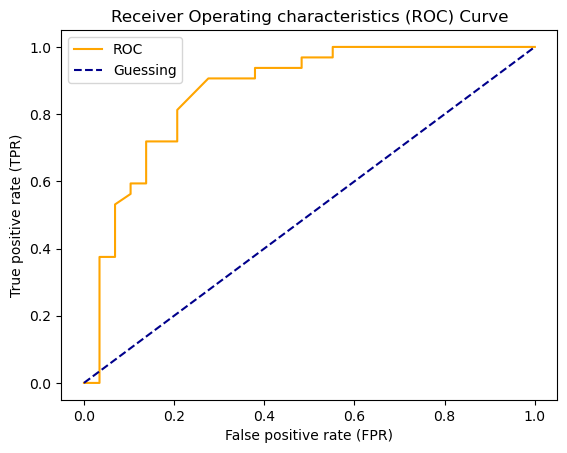

In [110]:
# create function for plotting ROC curve
import matplotlib.pyplot as plt

def plotROC(fpr,tpr):
    '''
    Plots a ROC curve gives the false positive rate (fpr) and
    true positive rate (tpr) of a model
    '''
    #plot ROC curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    #plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("Receiver Operating characteristics (ROC) Curve")
    plt.legend()
    plt.show()
    
plotROC(fpr,tpr)   

In [111]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probe_positive)

0.8669181034482759

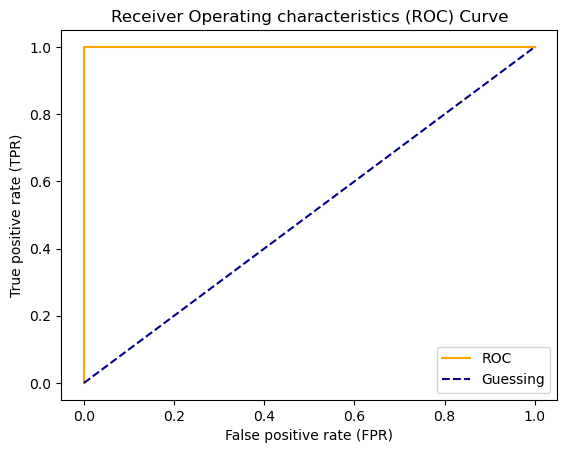

In [112]:
# plot perfect ROC curve and AUC curve
fpr,tpr,threshold = roc_curve(y_test,y_test)  # we comparinfg y_test with y_test, itself
plotROC(fpr,tpr)

In [113]:
roc_auc_score(y_test, y_test)

1.0

## Confusion Matrix

A confusion matrix is a quick way to compare the label  model predicts  and the actual labels it was supposed to predict.

in essence, giving you an idea of where the model is getting confused.

In [114]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [115]:
y_preds.shape, y_test.shape

((61,), (61,))

In [116]:
# Visualise confusion matrix with pd.crosstab()

pd.crosstab(y_test,y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [117]:
23+6+6+26

61

In [118]:
len(x_test)

61

<AxesSubplot:>

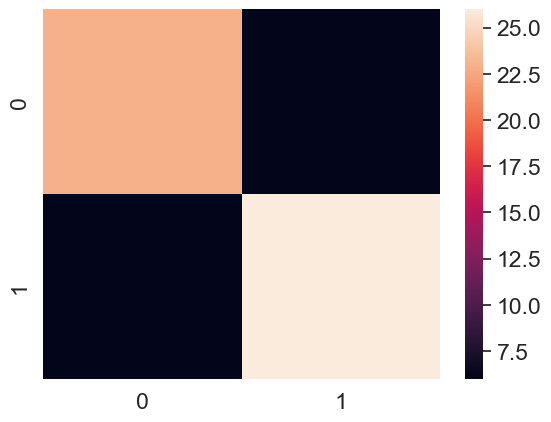

In [119]:
# Make our confussion matrics with seaborn heatmap
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#create a confussion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# plot using seaborn
sns.heatmap(conf_mat)

### Creating a confusion matrix using scikit learn

To use the new method of creating confusion matrix with scikit learn version required 1.0+

In [120]:
import sklearn
sklearn.__version__

'1.1.3'

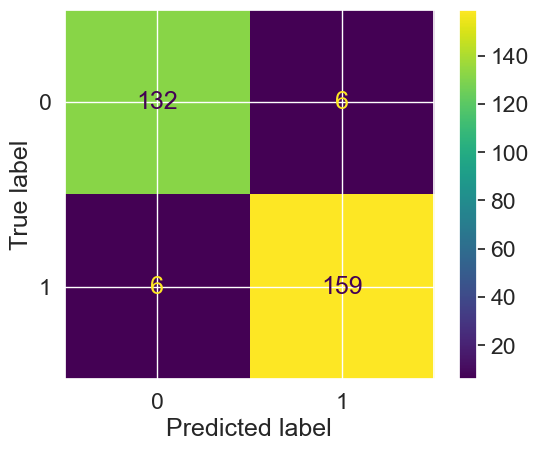

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay

#method 1 from_estimators
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y)

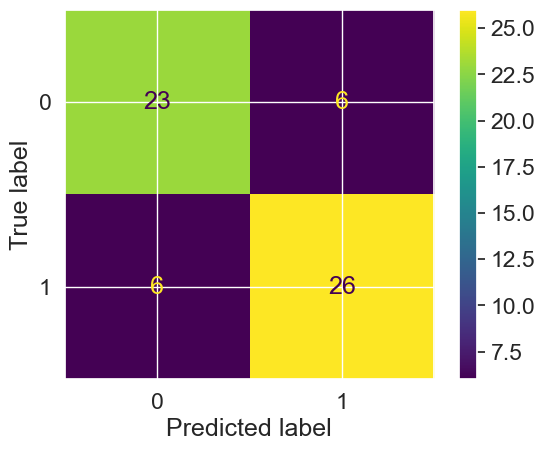

In [122]:
#method 1 from_predictions

ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

### Classification Report

In [123]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [124]:
# where precison and recall become valuable
# import warnings
# warnings.fliterwarings("ignore")

disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                  output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
    
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

The ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.  For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [125]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= house_df.drop("target",axis=1)
y= house_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=150)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=150)

In [126]:
model.score(x_test,y_test)


0.8067246622225314

In [127]:
y_preds = model.predict(x_test)

In [128]:
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [129]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
#Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [130]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [131]:
r2_score(y_true=y_test,
        y_pred=y_preds)

0.8067246622225314

####  **mean_absolute_error** (MAE)

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [132]:
mean_absolute_error(y_test,y_preds)

0.3265889786660209

In [133]:
df = pd.DataFrame(data={"Actual Value":y_test,
                       "Predicted Value":y_preds})
df["difference"] = df["Predicted Value"]-df["Actual Value"]
df.head(10)

,Actual Value,Predicted Value,difference
20046,0.47700,0.487280,0.010280
3024,0.45800,0.724000,0.266000
15663,5.00001,4.951887,-0.048123
20484,2.18600,2.570447,0.384447
9814,2.78000,2.317280,-0.462720
13311,1.58700,1.646393,0.059393
7113,1.98200,2.289540,0.307540
7668,1.57500,1.657220,0.082220
18246,3.40000,2.491807,-0.908193
5723,4.46600,4.872108,0.406108


In [134]:
# mean mae using formula
np.abs(df["difference"]).mean()

0.3265889786660209

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [135]:
mean_squared_error(y_test,y_preds)

0.25326973789613744

In [136]:
df["Squared Diff"] = np.square(df["difference"])
df.head(10)

,Actual Value,Predicted Value,difference,Squared Diff
20046,0.47700,0.487280,0.010280,0.000106
3024,0.45800,0.724000,0.266000,0.070756
15663,5.00001,4.951887,-0.048123,0.002316
20484,2.18600,2.570447,0.384447,0.147799
9814,2.78000,2.317280,-0.462720,0.214110
13311,1.58700,1.646393,0.059393,0.003528
7113,1.98200,2.289540,0.307540,0.094581
7668,1.57500,1.657220,0.082220,0.006760
18246,3.40000,2.491807,-0.908193,0.824815
5723,4.46600,4.872108,0.406108,0.164924


In [137]:
# mean mse using formula
np.abs(df["Squared Diff"]).mean()

0.25326973789613744

### 4.2.3 Finally using  `scoring` parameter

In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [139]:
np.random.seed(42)

#cross-validation accuracy
cv_acc = cross_val_score(clf,x,y,cv=10,scoring=None)  # if scoring is None then  default scoring evaulation metric is used (accuracy for classification models)
cv_acc

array([0.80645161, 0.80645161, 0.87096774, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.76666667])

In [140]:
# cross validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 81.84%


In [141]:
np.random.seed(42)

#cross-validation precision
cv_pre = cross_val_score(clf,x,y,cv=10,scoring="precision") 
cv_pre

array([0.78947368, 0.82352941, 0.88235294, 0.9375    , 0.85      ,
       0.92307692, 0.75      , 0.78947368, 0.7       , 0.73684211])

In [142]:
# cross validated precision
print(f"The cross-validated precision is: {np.mean(cv_pre)*100:.2f}%")

The cross-validated precision is: 81.82%


In [143]:
np.random.seed(42)

#cross-validation recall
cv_recall = cross_val_score(clf,x,y,cv=10,scoring="recall") 
cv_recall

array([0.88235294, 0.82352941, 0.88235294, 0.88235294, 1.        ,
       0.75      , 0.75      , 0.9375    , 0.875     , 0.875     ])

In [144]:
# cross validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%")

The cross-validated recall is: 86.58%


Let's see `scoring` paramter being using for a regression problem...

In [145]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= house_df.drop("target",axis=1)
y= house_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

In [146]:
cv_r2 = cross_val_score(model,x,y,cv=5,scoring=None)
cv_r2

array([0.50097272, 0.70273041, 0.74115332, 0.61556377, 0.68253631])

In [147]:
np.mean(cv_r2)

0.6485913076211464

In [148]:
# mean absolute error
cv_mae = cross_val_score(model,x,y,cv=3,scoring="neg_mean_absolute_error")
cv_mae

array([-0.52191674, -0.42327503, -0.50749649])

In [149]:
np.mean(cv_mae)

-0.4842294200387598

### 4.3 Using different evaluation metrics scikit learn functions.

In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x = heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_preds = clf.predict(x_test)

In [151]:
# precision recall
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 83.61%
Precision: 0.8285714285714286
Recall: 0.8787878787878788
F1: 0.8529411764705883


In [152]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
x = house_df.drop("target", axis=1)
y = house_df["target"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(x_train, y_train)

# Make predictions
y_preds = model.predict(x_test)

In [153]:
# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_preds)}")
print(f"Mean Square Error: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8065734772187598
Mean Absolute Error: 0.32659871732073664
Mean Square Error: 0.2534678520824551


## 5. Improving a Model

First predictions = Baseline predictions
First Model - Baseline model.

**From a data perspective** 
* Could we collect more data? (Generally, the more data, the better)
* Could we improve our data ?

**From model perspective** 
* Is there a better model we could use?
* Could we improve the current model?

**Parameters vs Hyperparameter**
* parameters= model find these patterns in data
* Hyperparamters = settings on model you can adjust to improve its ability to find patterns

**Three ways to adjust hyperparameter**
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [154]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tunning Hyperparameter by hand

Lets make 3 sets:
  1. Training set.
  2. Validation set.
  3. Test set

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_sample_split`
* `n_estimators`

In [155]:
from sklearn.metrics import accuracy_score

In [156]:
def evaluate_prediction(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    acc = accuracy_score(y_true,y_preds)
    pre = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy": round(acc, 2),
                   "precision": round(pre, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {acc * 100:.2f}%")
    print(f"Precision: {pre:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict
    

In [157]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
heart_disease_shuffled = heart_disease.sample(frac=1)

x = heart_disease_shuffled.drop("target",axis=1)
y= heart_disease_shuffled["target"]

x_train,x_rem,y_train,y_rem = train_test_split(x,y,test_size=0.3)
x_val,x_test,y_val,y_test = train_test_split(x_rem,y_rem,test_size=0.5)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

#Base Line predictions
y_preds = clf.predict(x_val)

baseline_metrics = evaluate_prediction(y_val, y_preds)
baseline_metrics

Acc: 75.56%
Precision: 0.74
Recall: 0.77
F1 score: 0.76


{'accuracy': 0.76, 'precision': 0.74, 'recall': 0.77, 'f1': 0.76}

In [158]:
len(x_train),len(x_val),len(x_test)

(212, 45, 46)

In [159]:
len(x_train)/len(x)*100,len(x_val)/len(x)*100,len(x_test)/len(x)*100

(69.96699669966998, 14.85148514851485, 15.181518151815181)

In [160]:
np.random.seed(42)
# create a another classifier with different hyperparameter
clf_2 = RandomForestClassifier(n_estimators=150)
clf_2.fit(x_train,y_train)

y_preds2 = clf_2.predict(x_val)

metrics2 = evaluate_prediction(y_val, y_preds2)
metrics2

Acc: 77.78%
Precision: 0.80
Recall: 0.73
F1 score: 0.76


{'accuracy': 0.78, 'precision': 0.8, 'recall': 0.73, 'f1': 0.76}

In [161]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [162]:
np.random.seed(42)
# create a another classifier with different hyperparameter
clf_2 = RandomForestClassifier(n_estimators=150,max_depth=20)
clf_2.fit(x_train,y_train)

y_preds2 = clf_2.predict(x_val)

metrics2 = evaluate_prediction(y_val, y_preds2)
metrics2

Acc: 77.78%
Precision: 0.80
Recall: 0.73
F1 score: 0.76


{'accuracy': 0.78, 'precision': 0.8, 'recall': 0.73, 'f1': 0.76}

In [163]:
np.random.seed(42)
# create a another classifier with different hyperparameter
clf_2 = RandomForestClassifier(n_estimators=150,max_depth=25,min_samples_leaf=15)
clf_2.fit(x_train,y_train)

y_preds2 = clf_2.predict(x_val)

metrics2 = evaluate_prediction(y_val, y_preds2)
metrics2

Acc: 80.00%
Precision: 0.81
Recall: 0.77
F1 score: 0.79


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.77, 'f1': 0.79}

In [164]:
np.random.seed(42)
# create a another classifier with different hyperparameter
clf_2 = RandomForestClassifier(n_estimators=150,max_depth=25,min_samples_leaf=15,max_features=200)
clf_2.fit(x_train,y_train)

y_preds2 = clf_2.predict(x_val)

metrics2 = evaluate_prediction(y_val, y_preds2)
metrics2

Acc: 80.00%
Precision: 0.78
Recall: 0.82
F1 score: 0.80


{'accuracy': 0.8, 'precision': 0.78, 'recall': 0.82, 'f1': 0.8}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [165]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "max_features": ["auto","sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

np.random.seed(42)
x = heart_disease_shuffled.drop("target",axis=1)
y= heart_disease_shuffled["target"]

x_train,x_rem,y_train,y_rem = train_test_split(x,y,test_size=0.3)
x_val,x_test,y_val,y_test = train_test_split(x_rem,y_rem,test_size=0.5)

clf = RandomForestClassifier(n_jobs=1)

#setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,param_distributions=grid,
                           n_iter=10,#model of models to try
                           cv=5,
                           verbose=2)
#fit rs-clf model
rs_clf.fit(x_train,y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [166]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [167]:
# Make predicitons with the best hyperparameters

rs_y_preds = rs_clf.predict(x_test)
rs_metrics = evaluate_prediction(y_test,rs_y_preds)

Acc: 80.43%
Precision: 0.80
Recall: 0.83
F1 score: 0.82


### 5.3 Hyperparameter tunning with GridSearchCV

Difference in RandomizedSearchCV and GridSearchCV:
    
**RandomizedSearchCV** is try= n_iter* cv   combinations.

**GridSearchCV** is try 'n_estimators'*'max_depth'x'max_features'x'min_samples_split'x'min_samples_leaf'

**GridSearchCV** more combinations


In [168]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [169]:
6*5*2*3*3 #total model

540

In [170]:
grid_2 = {'n_estimators': [200, 500],
 'max_depth': [None, 5],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [4],
 'min_samples_leaf': [2, 4]}

In [171]:
2*2*2*2*2

32

In [172]:
from sklearn.model_selection import GridSearchCV 

np.random.seed(42)
x = heart_disease_shuffled.drop("target",axis=1)
y= heart_disease_shuffled["target"]

x_train,x_rem,y_train,y_rem = train_test_split(x,y,test_size=0.3)
x_val,x_test,y_val,y_test = train_test_split(x_rem,y_rem,test_size=0.5)

clf = RandomForestClassifier(n_jobs=1)

#setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,param_grid=grid_2,
                           cv=5,
                           verbose=2)
#fit rs-clf model
gs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4], 'min_samples_split': [4],
                         'n_estimators': [200, 500]},
             verbose=2)

In [173]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500}

In [174]:
gs_y_preds = gs_clf.predict(x_test)

gs_metrics = evaluate_prediction(y_test,gs_y_preds)

Acc: 78.26%
Precision: 0.79
Recall: 0.79
F1 score: 0.79


In [175]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": metrics2,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics

,baseline,clf_2,random search,grid search
accuracy,0.76,0.80,0.80,0.78
precision,0.74,0.78,0.80,0.79
recall,0.77,0.82,0.83,0.79
f1,0.76,0.80,0.82,0.79


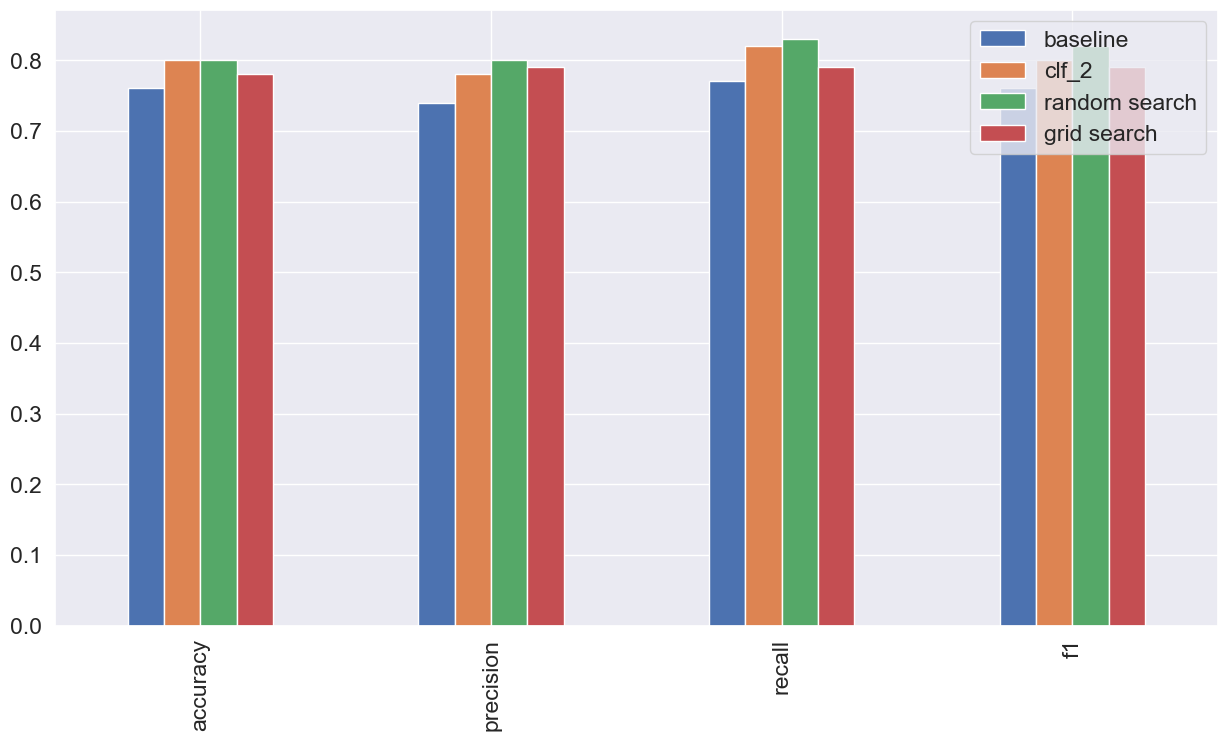

In [176]:
compare_metrics.plot.bar(figsize=(15,8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module.
2. With the `joblib` module

**Pickle**

In [177]:
import pickle

#Save an existing model to file
pickle.dump(gs_clf,open("gs_random_forest_model1.pkl",("wb")))

In [178]:
# load pickle model
loaded_pickel_model = pickle.load(open("gs_random_forest_model1.pkl","rb"))

In [179]:
pickle_y_preds = loaded_pickel_model.predict(x_test)
evaluate_prediction(y_test,pickle_y_preds)

Acc: 78.26%
Precision: 0.79
Recall: 0.79
F1 score: 0.79


{'accuracy': 0.78, 'precision': 0.79, 'recall': 0.79, 'f1': 0.79}

**Joblib**

In [180]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [181]:
loaded_joblib_model = load("gs_random_forest_model_1.joblib")
joblib_y_preds = loaded_joblib_model.predict(x_test)

In [182]:
evaluate_prediction(y_test,pickle_y_preds)

Acc: 78.26%
Precision: 0.79
Recall: 0.79
F1 score: 0.79


{'accuracy': 0.78, 'precision': 0.79, 'recall': 0.79, 'f1': 0.79}

## 7. Putting all together

In [183]:
# Getting data ready.
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Setup Random seed
import numpy as np
np.random.seed(42)

# Import data and drop with missing label
dataset = pd.read_csv("car-sales-missing-extended-priceupdated.csv")
dataset.dropna(subset=["Price"],inplace=True)

# Define different features and transformer pipeline
cat_feature = ["Make","Colour"]
cat_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
                                   ("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_features = ["Doors"]
door_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])

#setup preprocessing data (Fill missing value then convert to numbers)
preprocessor = ColumnTransformer(
                                transformers=[
                                    ("cat",cat_transformer,cat_feature),
                                    ("door",door_transformer,door_features),
                                    ("num",numeric_transformer,numeric_features)
                                ])
#creating a preprocessing and modelling pipeline
model =Pipeline(steps=[("preprocessor",preprocessor),
                       ("model",RandomForestRegressor(n_estimators=100))])
# Split data
x = dataset.drop("Price",axis=1)
y = dataset["Price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) 
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.22188417408787875

It is also possoble to use ` RandomizedSearchCV` with our  ` pipeline`

In [184]:
# Use GridSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

pipe_grid={
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,500,1000],
    "model__max_depth":[None,5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4],
}

gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 500, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [185]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'auto',
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}

In [186]:
gs_model.score(x_test,y_test)

0.3336854281571541

In this notebook I have covered, required scikit for machine learning